In [1]:
from models import cnn_model


d:\intern\intern\imageclassification


In [2]:
model = cnn_model.build_simple_cnn_model()
cnn_model.save_model(model)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 427,065 (1.63 MB)

 Trainable params: 427,065 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
model = cnn_model.load_saved_model()

In [4]:
from modules import data_loader

d:\intern\intern\imageclassification


In [13]:
# data = data_loader.tensorflow_load_data('data1/train')
# data_loader.save_dataset(data)
data = data_loader.load_saved_dataset()
data = data.map(lambda x,y:(x/255.0,y))
train_ds,val_ds,test_ds = data_loader.split_data(data)

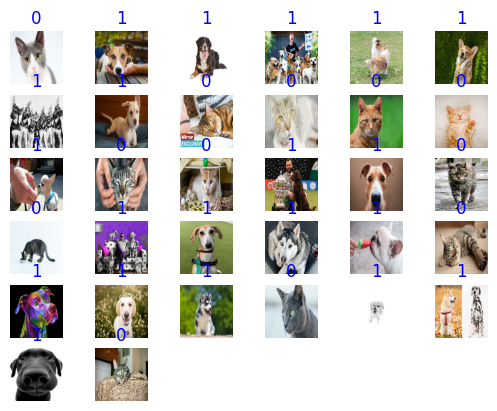

In [15]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
data_loader.show_image(batch[0],batch[1])

In [16]:
hist = cnn_model.train_model(model,train_ds=train_ds,val_ds=val_ds,epochs=20)

Epoch 1/20


ValueError: Unknown variable: <KerasVariable shape=(3, 3, 3, 32), dtype=float32, path=sequential/conv2d/kernel>. This optimizer can only be called for the variables it was originally built with. When working with a new set of variables, you should recreate a new optimizer instance.